<a href="https://colab.research.google.com/github/ashishpatel26/tcn-keras-Examples/blob/master/TCN_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the Packages

In [1]:
!pip install keras-tcn

In [2]:
import numpy as np
from tensorflow.keras import Model, Input
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tcn import TCN

### Define the max features

In [3]:
max_features = 20000

In [4]:
maxlen = 100
batch_size = 32

### Load the IMDB Dataset

In [5]:
print("Loading Data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading Data...


### Print the shape of dataset

In [6]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (25000,)
y_train shape: (25000,)
X_test shape: (25000,)
y_test shape: (25000,)


### Pad Sequence(Samples X Time)
* Pad Sequence added and see the shape for X 

In [7]:
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
print(f"X_train shape: {x_train.shape}")
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
print(f"X_test shape: {x_test.shape}")

X_train shape: (25000, 100)
X_test shape: (25000, 100)


* Convert target y into Numpy Array 

In [8]:
y_train = np.array(y_train)
print(f"y_train shape: {y_train.shape}")
y_test = np.array(y_test)
print(f"y_test shape: {y_test.shape}")

y_train shape: (25000,)
y_test shape: (25000,)


### Design the TCN Model

In [17]:
i = Input(shape = (maxlen,))
x = Embedding(max_features, 128)(i)
x = TCN(nb_filters = 64, kernel_size=6, dilations=[1,2,4,8,16,32,64])(x)
x = Dropout(0.5)(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
tcn_1 (TCN)                  (None, 64)                377792    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,937,857
Trainable params: 2,937,857
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [18]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 10, validation_data = [x_test, y_test])

Epoch 1/10
782/782 [==============================] - 13s 17ms/step - loss: 0.6969 - accuracy: 0.5008 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
782/782 [==============================] - 13s 16ms/step - loss: 0.6910 - accuracy: 0.5264 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
782/782 [==============================] - 13s 16ms/step - loss: 0.6892 - accuracy: 0.5370 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
782/782 [==============================] - 13s 16ms/step - loss: 0.6869 - accuracy: 0.5500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
782/782 [==============================] - 13s 16ms/step - loss: 0.6838 - accuracy: 0.5562 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
782/782 [==============================] - 13s 16ms/step - loss: 0.6737 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
782/782 [==============================] - 13s 16ms/step - loss: 0.6542 - acc

In [19]:
result = model.evaluate(x_test, y_test)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")

782/782 [==============================] - 4s 5ms/step - loss: 0.5595 - accuracy: 0.6995
Accuracy : 69.95 %
Loss : 55.95 %


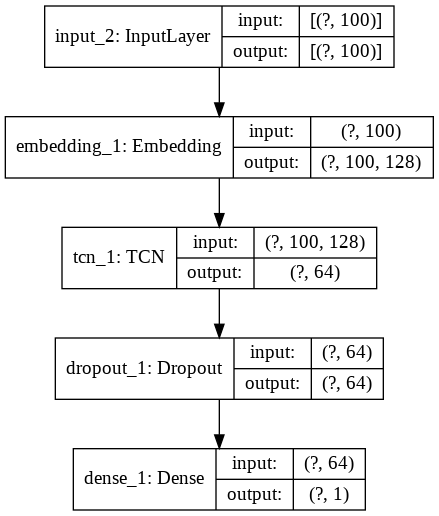

In [20]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

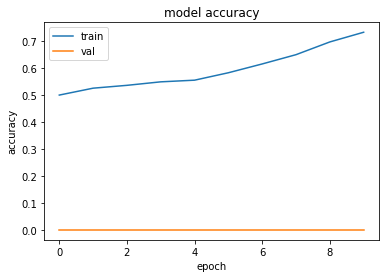

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
y_pred = model.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [32]:
yhat_probs = model.predict(x_test, verbose=0)
print(y_test)
print(np.argmax(yhat_probs, axis=1))

[0 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]


Cohens kappa: 0.000000
ROC AUC: 0.500000
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12500
           1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


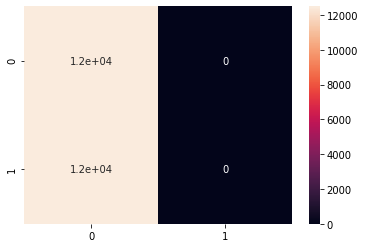

In [41]:
# predict probabilities for test set
yhat_probs = np.argmax(model.predict(x_test, verbose=0), axis=1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_probs)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

print(classification_report(y_test, yhat_probs))
# confusion matrix
matrix = confusion_matrix(y_test, yhat_probs)
sns.heatmap(matrix, annot=True)
